In [55]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [56]:
(train_data,train_labels),(test_data,test_labels) = fashion_mnist.load_data()

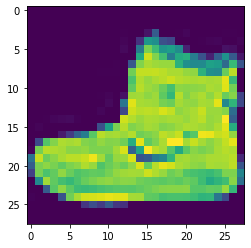

In [57]:
# Check the shape of a single example
plt.imshow(train_data[0])

In [58]:
train_data_norm = train_data/255.0
test_data_norm = test_data / 255.0
# Creating model
tf.random.set_seed(42)

model_1 =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
#Create the learnign rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
norm_history=model_1.fit(train_data_norm,
                            tf.one_hot(train_labels,depth=10),
                            epochs=40,
                            validation_data=(test_data_norm,tf.one_hot(test_labels,depth=10)),
                        )

Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

Text(0, 0.5, 'Loss')

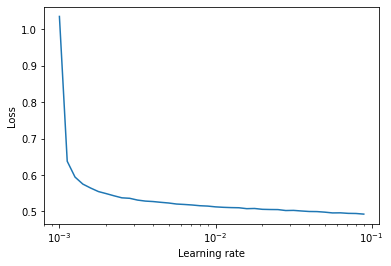

In [65]:
import pandas as pd
#pd.DataFrame(norm_history.history).plot(title="Norm")

lrs=1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,norm_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [66]:
y_probs=model_1.predict(test_data)
y_preds = y_probs.argmax(axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred = y_preds)

array([[689,   3,   4,  81,  36,   0, 164,   0,  23,   0],
       [  7, 930,   1,  33,  23,   0,   3,   0,   2,   1],
       [ 21,   1, 348,   7, 482,   0, 111,   0,  29,   1],
       [ 33,  11,   1, 743, 144,   0,  31,   0,  35,   2],
       [  0,   0,  16,   6, 944,   0,  25,   0,   9,   0],
       [  0,   0,   3,   0,   0, 299,   0,  46, 139, 513],
       [122,   1,  45,  38, 423,   0, 326,   0,  44,   1],
       [  0,   0,   0,   0,   0,   1,   0, 713,   4, 282],
       [  6,   0,   9,  12,  19,   1,   6,   5, 939,   3],
       [  0,   0,   0,   0,   0,   0,   0,   5,   2, 993]], dtype=int64)

In [67]:
# find the layers of our most recent model
model_1.layers

In [68]:
# Get the patterns of a layer in our network
weights,biases = model_1.layers[1].get_weights()
weights,weights.shape

(array([[ 1.5932959 , -0.7686997 , -1.5784507 , -1.9988147 ],
        [ 0.45667922, -1.2957742 , -0.7322074 , -0.16243088],
        [ 1.3499514 , -0.200231  , -1.989762  , -1.2142688 ],
        ...,
        [-0.21869308,  0.5934652 , -0.2728196 ,  0.46215105],
        [-0.21825321,  1.1962793 ,  0.5423628 , -0.579176  ],
        [ 0.3746474 , -0.1999165 ,  0.02721411,  0.24651003]],
       dtype=float32),
 (784, 4))

In [73]:
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [74]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.
